<a href="https://colab.research.google.com/github/pdpavandesai/MergingDiabetesData/blob/main/ModelBuilding_WithoutClinicalFeatures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import warnings
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
from google.colab import files
uploaded = files.upload()

Saving FinalMegedDS.csv to FinalMegedDS.csv


In [4]:
fmds_actual = pd.read_csv('FinalMegedDS.csv')
fmds_copy = fmds_actual.copy()
print("Shape of FMDS before removing duplicates: ",fmds_copy.shape)
actual_rows = fmds_copy.shape[0]
fmds_copy = fmds_copy.drop_duplicates()
print('Shape of dataset after removing the duplicates: ',fmds_copy.shape)
rows_after_deleting_duplicates = fmds_copy.shape[0]
print('No.of Duplicate rows in the Ishan Dutta''s Dataset = ', (actual_rows - rows_after_deleting_duplicates))

Shape of FMDS before removing duplicates:  (282675, 11)
Shape of dataset after removing the duplicates:  (69522, 11)
No.of Duplicate rows in the Ishan Duttas Dataset =  213153


In [5]:
print(fmds_copy.head())
print('')
print('===Information of FMDS===')
print(fmds_copy.info())
print('')
print('===Description of FMDS===')
print(fmds_copy.describe())

   Gender  Age  HighBP   BMI  Smoker  HeartDisease  HbA1cLevel  \
0       0    9       1  40.0       1           1.0    5.211000   
1       0    7       0  25.0       1           0.0    4.729000   
2       0    9       1  28.0       0           1.0    4.975333   
3       0   11       1  27.0       0           0.0    4.917000   
4       0   11       1  24.0       0           1.0    5.149000   

   BloodGlucoseLevel  HighChol  HvyAlcoholConsump  Diabetes  
0          96.950000       1.0                  0         0  
1          91.190000       0.0                  0         0  
2          96.293333       1.0                  0         0  
3          91.285000       0.0                  0         0  
4          98.700000       1.0                  0         0  

===Information of FMDS===
<class 'pandas.core.frame.DataFrame'>
Int64Index: 69522 entries, 0 to 282674
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  ----- 

In [6]:
print('===No.of Unique Values===')
print(fmds_copy.nunique())
print('')
print('===Check for any NAN values===')
print(fmds_copy.isnull().sum())

===No.of Unique Values===
Gender                  3
Age                    14
HighBP                  2
BMI                  3866
Smoker                  3
HeartDisease          110
HbA1cLevel           4359
BloodGlucoseLevel    8314
HighChol                6
HvyAlcoholConsump       2
Diabetes                3
dtype: int64

===Check for any NAN values===
Gender               0
Age                  0
HighBP               0
BMI                  0
Smoker               0
HeartDisease         0
HbA1cLevel           0
BloodGlucoseLevel    0
HighChol             0
HvyAlcoholConsump    0
Diabetes             0
dtype: int64


In [30]:
fmds_train = fmds_copy.copy()
y = fmds_train.Diabetes
X = fmds_train.drop(['Diabetes'], axis=1)
print(X)
print(y)

        Gender  Age  HighBP    BMI  Smoker  HeartDisease  HbA1cLevel  \
0            0    9       1  40.00       1           1.0    5.211000   
1            0    7       0  25.00       1           0.0    4.729000   
2            0    9       1  28.00       0           1.0    4.975333   
3            0   11       1  27.00       0           0.0    4.917000   
4            0   11       1  24.00       0           1.0    5.149000   
...        ...  ...     ...    ...     ...           ...         ...   
282670       0    2       0  34.34       2           0.0    6.500000   
282671       0    5       0  40.69       2           0.0    3.500000   
282672       1   10       0  27.83       1           0.0    5.700000   
282673       0    1       0  35.42       2           0.0    4.000000   
282674       0    8       0  22.43       0           0.0    6.600000   

        BloodGlucoseLevel  HighChol  HvyAlcoholConsump  
0               96.950000       1.0                  0  
1               91.19

In [31]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.1, random_state=1)
X_train.shape,y_train.shape,X_val.shape,y_val.shape

((62569, 10), (62569,), (6953, 10), (6953,))

In [35]:
GBR = GradientBoostingRegressor(random_state=1, n_estimators=1000, max_depth=10).fit(X_train,y_train)
print(GBR.score(X_train,y_train))

0.9554957773603292


In [39]:
GBR_pred = GBR.predict(X_val)
print(GBR_pred)
rms = mean_squared_error(y_val,GBR_pred,squared=True)
print(rms)

[ 0.00040255 -0.00118789 -0.00227224 ... -0.00078314  0.01716974
  0.00053802]
0.0852786473547993


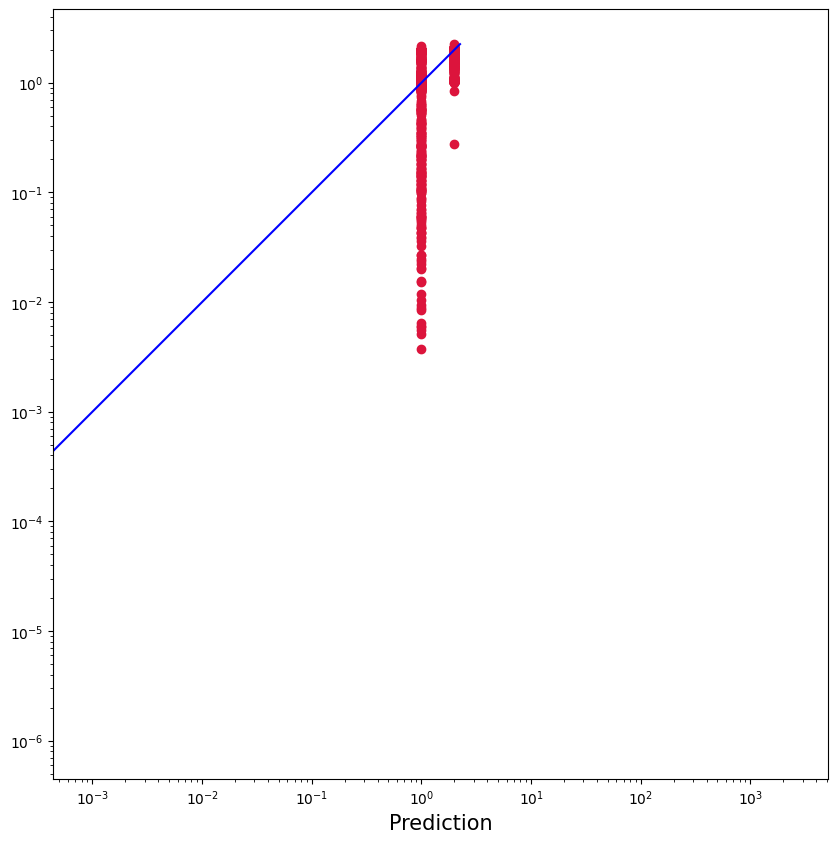

In [40]:
plt.figure(figsize=(10,10))
plt.scatter(y_val,GBR_pred,c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(GBR_pred), max(y_val))
p2 = min(min(GBR_pred), min(y_val))
plt.plot([p1,p2],[p1,p2],'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.xlabel('Prediction', fontsize=15)
plt.axis('equal')
plt.show()